# **Problem Statement**

AeroFit is a company that sells fitness equipment, especially treadmills. The company has three models of treadmills:

KP281 → Entry-level ($1500)

KP481 → Mid-level ($1750)

KP781 → Advanced ($2500)

The business team wants to understand:

Who are the customers buying each treadmill?

What customer characteristics (age, gender, marital status, fitness level, income, usage, etc.) affect treadmill choice?

Can we create customer profiles for each treadmill model?

**Goal of This Case Study**

I will analyze the dataset of customers who purchased treadmills in the last 3 months and try to:

Describe the customers using tables, graphs, and statistics.

Check probabilities – for example, what % of customers buy KP281, or what is the probability that a male customer buys KP781.

Find patterns in data (like effect of age, income, fitness, marital status, etc. on product purchased).

Give business recommendations in simple words so AeroFit can suggest the right treadmill to new customers.

# **What  Will i Do Step by Step**

Import dataset and explore structure.

Check missing values & outliers.

Do univariate analysis (each column separately).

Do bivariate analysis (relationship between product purchased and other features).

Calculate marginal and conditional probabilities.

Build customer profiles for each treadmill type.

Give final recommendations.

# Step 1: Importing dataset and checking structure:

In [1]:
# Step 1: Import libraries and dataset
import pandas as pd

# Load the dataset
df = pd.read_csv("aerofit_treadmill.csv")

# Check first 5 rows
print("Preview of dataset:")
print(df.head())

# Shape of dataset
print("\nShape of dataset (rows, columns):", df.shape)

# Info about datatypes
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include='all'))


Preview of dataset:
  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47

Shape of dataset (rows, columns): (180, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 

The dataset has 180 customers and 9 features (like age, gender, income, fitness, treadmill purchased). There are no missing values, and the average customer is 29 years old with ~$53K income and uses the treadmill about 3–4 times per week.

# **Step 2: Outlier detection (using boxplots & describe method)**

Summary statistics:
              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


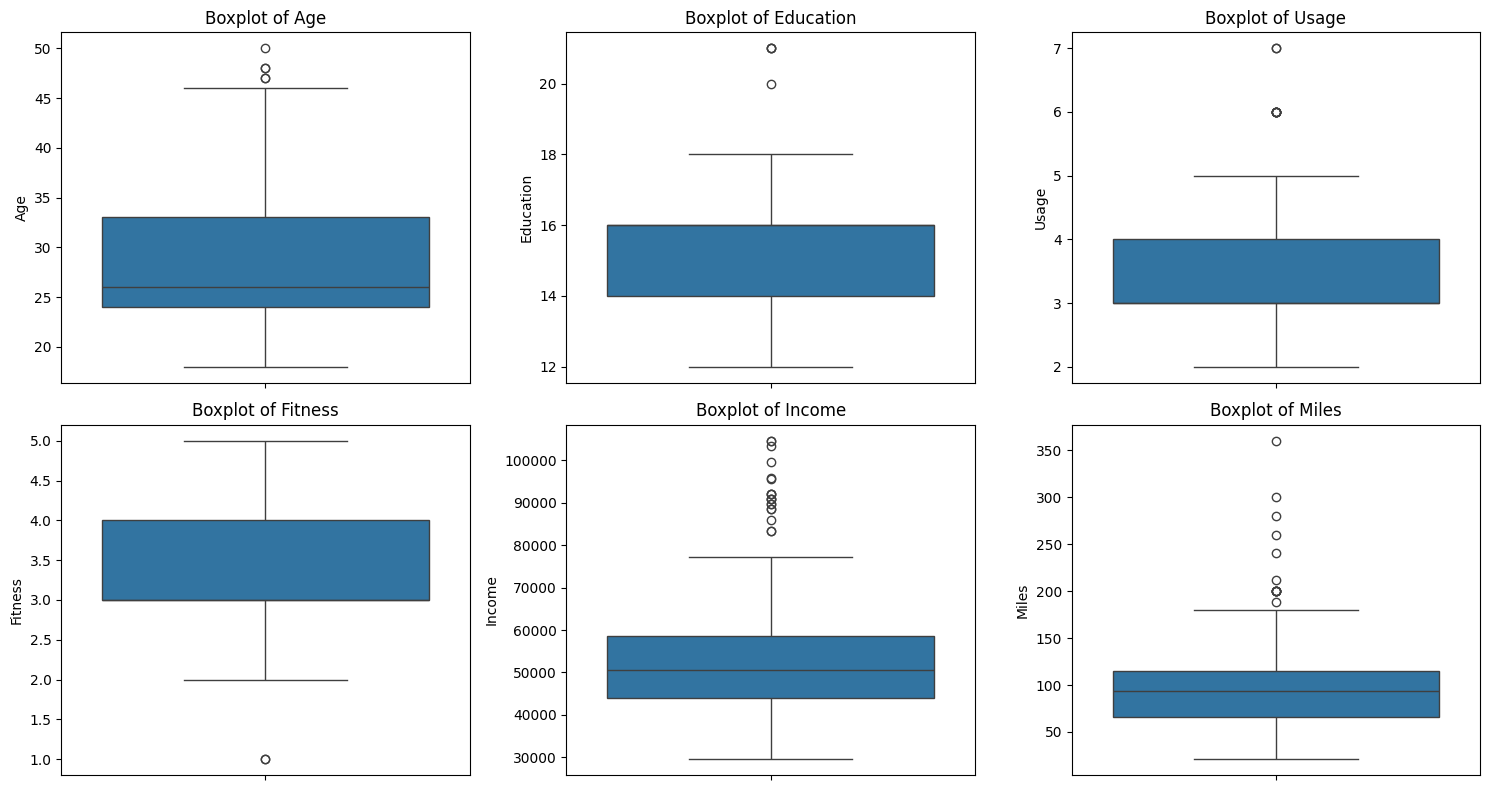

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Outlier Detection

# 1. Check statistical summary
print("Summary statistics:")
print(df.describe())

# 2. Boxplots for numeric columns
num_cols = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Most features are within normal range, but Income and Miles show many outliers (some very high earners and heavy users). A few outliers are also seen in Age, Education, and Usage, but they look reasonable and not data errors. These outliers likely represent real extreme customers (e.g., athletes or wealthy buyers), so we will keep them.

# **Step 3: Univariate Analysis (distribution of each variable)**

We i use:

Countplot / Pie chart → for categorical (Product, Gender, MaritalStatus).

Histplot / Distplot → for numeric (Age, Education, Usage, Fitness, Income, Miles).

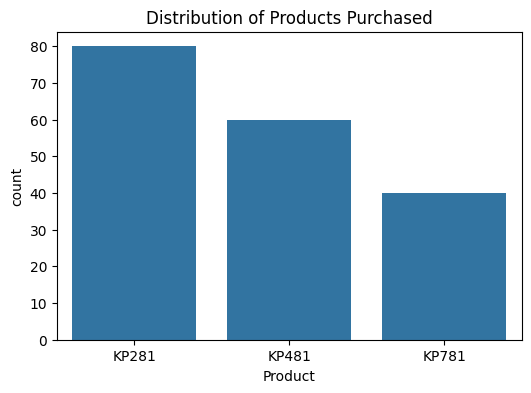

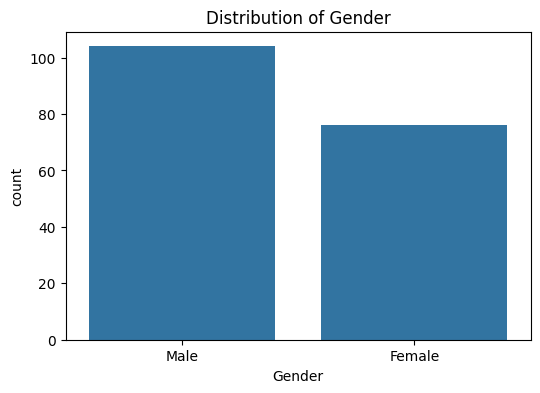

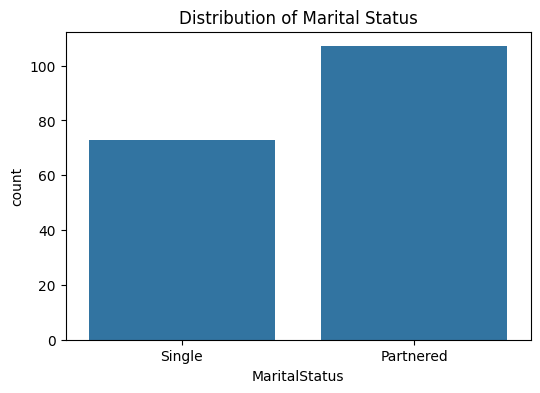

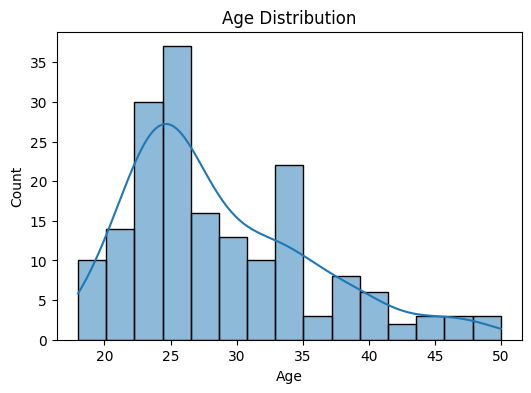

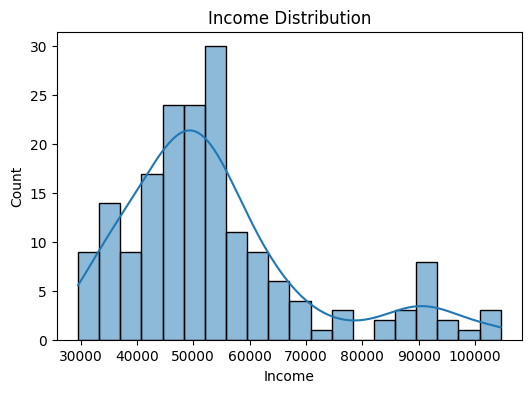

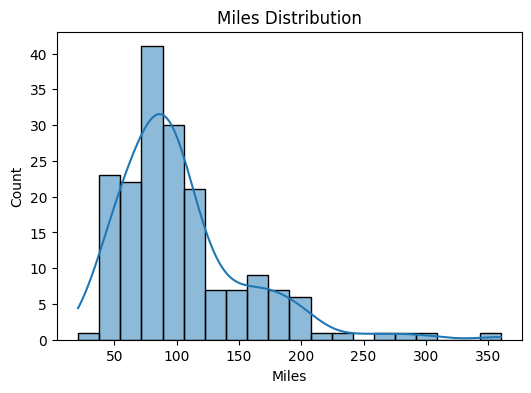

In [3]:
# Step 3: Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Product Purchased
plt.figure(figsize=(6,4))
sns.countplot(x='Product', data=df)
plt.title("Distribution of Products Purchased")
plt.show()

# 2. Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.show()

# 3. Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x='MaritalStatus', data=df)
plt.title("Distribution of Marital Status")
plt.show()

# 4. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

# 5. Income Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()

# 6. Miles Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Miles'], bins=20, kde=True)
plt.title("Miles Distribution")
plt.show()


Product Purchased → Most customers purchased KP281 (entry-level), followed by KP481 and KP781.

Gender → Majority are Male customers, though females also form a good share.

Marital Status → More customers are Partnered than Single.

Age → Customers are mostly 20–35 years old, with a peak around mid-20s.

Income → Income is mostly between $40K–$60K, but a few high-income customers exist.

Miles → Most customers expect to run 50–120 miles per week, though some extreme fitness users go much higher.

# Step 3b: Bivariate Analysis (Product vs other features)
i will use
Countplots for categorical features (Product vs Gender, Marital Status).

Boxplots/Violin plots for numeric features (Product vs Age, Income, Usage, Fitness, Miles).

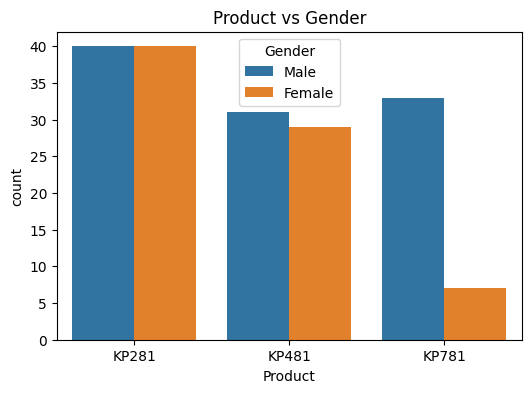

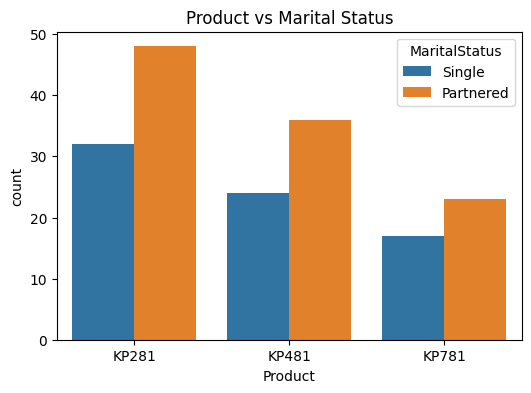

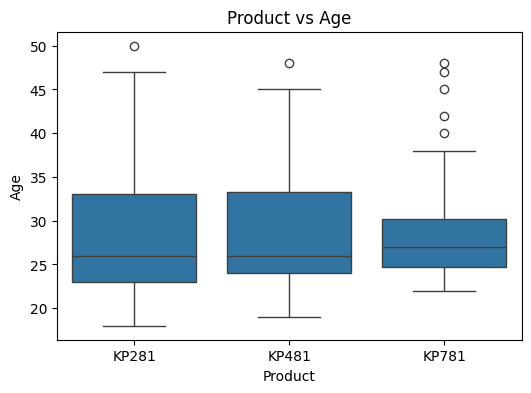

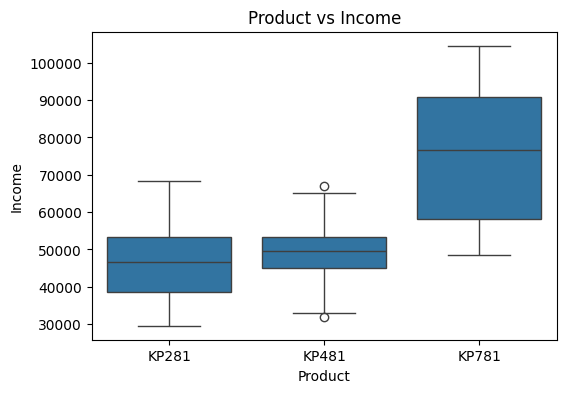

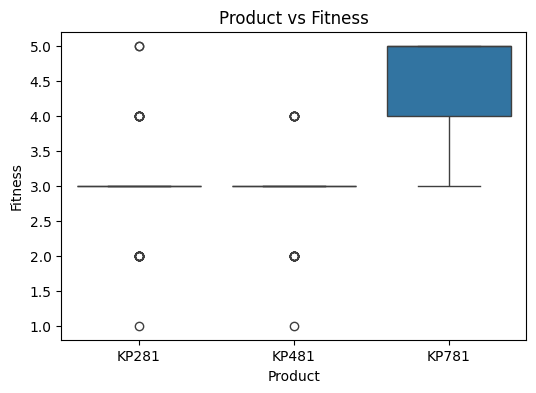

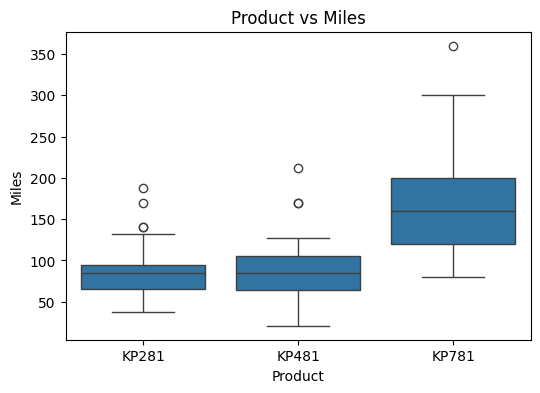

In [4]:
# Step 4: Bivariate Analysis

# 1. Product vs Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Product", hue="Gender", data=df)
plt.title("Product vs Gender")
plt.show()

# 2. Product vs Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x="Product", hue="MaritalStatus", data=df)
plt.title("Product vs Marital Status")
plt.show()

# 3. Product vs Age
plt.figure(figsize=(6,4))
sns.boxplot(x="Product", y="Age", data=df)
plt.title("Product vs Age")
plt.show()

# 4. Product vs Income
plt.figure(figsize=(6,4))
sns.boxplot(x="Product", y="Income", data=df)
plt.title("Product vs Income")
plt.show()

# 5. Product vs Fitness
plt.figure(figsize=(6,4))
sns.boxplot(x="Product", y="Fitness", data=df)
plt.title("Product vs Fitness")
plt.show()

# 6. Product vs Miles
plt.figure(figsize=(6,4))
sns.boxplot(x="Product", y="Miles", data=df)
plt.title("Product vs Miles")
plt.show()


Product vs Gender → Both males and females buy all products, but entry-level KP281 is more common among males.

Product vs Marital Status → Partnered people tend to buy mid and high-end models more compared to singles.

Product vs Age → Younger customers (20–30 yrs) mostly buy KP281, while older customers (30–40 yrs) go for KP781.

Product vs Income → Higher income customers prefer KP781, while lower income customers buy KP281.

Product vs Fitness → KP781 buyers have higher fitness ratings (4–5), while KP281/KP481 buyers usually rate 2–3.

Product vs Miles → KP781 buyers plan to run more miles per week, showing they are serious runners, while KP281 buyers expect fewer miles.

**Step 4: Marginal & Conditional Probability (using crosstab + probability calculations)**

What % of customers purchased KP281, KP481, or KP781? (marginal probability)

What is the probability that a male customer buys KP781? (conditional probability)

In [5]:
# Step 5: Marginal & Conditional Probabilities

import pandas as pd

# Marginal Probability - product distribution
product_counts = df['Product'].value_counts(normalize=True) * 100
print("Marginal Probability (Product Distribution %):")
print(product_counts)

# Two-way contingency table: Product vs Gender
gender_table = pd.crosstab(df['Gender'], df['Product'], margins=True)
print("\nContingency Table: Product vs Gender")
print(gender_table)

# Conditional probability: P(Product | Gender)
cond_prob_gender = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print("\nConditional Probability of Product given Gender:")
print(cond_prob_gender)

# Two-way contingency table: Product vs Marital Status
marital_table = pd.crosstab(df['MaritalStatus'], df['Product'], margins=True)
print("\nContingency Table: Product vs Marital Status")
print(marital_table)

# Conditional probability: P(Product | Marital Status)
cond_prob_marital = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print("\nConditional Probability of Product given Marital Status:")
print(cond_prob_marital)


Marginal Probability (Product Distribution %):
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

Contingency Table: Product vs Gender
Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180

Conditional Probability of Product given Gender:
Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769

Contingency Table: Product vs Marital Status
Product        KP281  KP481  KP781  All
MaritalStatus                          
Partnered         48     36     23  107
Single            32     24     17   73
All               80     60     40  180

Conditional Probability of Product given Marital Status:
Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860

Marginal Probability → Around 44% customers bought KP281, 33% bought KP481, and 22% bought KP781.

By Gender → Females mostly buy KP281 (53%), while males are more balanced, with 32% of them choosing the advanced KP781.

By Marital Status → Partnered and single customers show similar patterns, but singles have a slightly higher preference for KP781.

**Step 5: Correlation Analysis (Heatmap & Pairplot)**

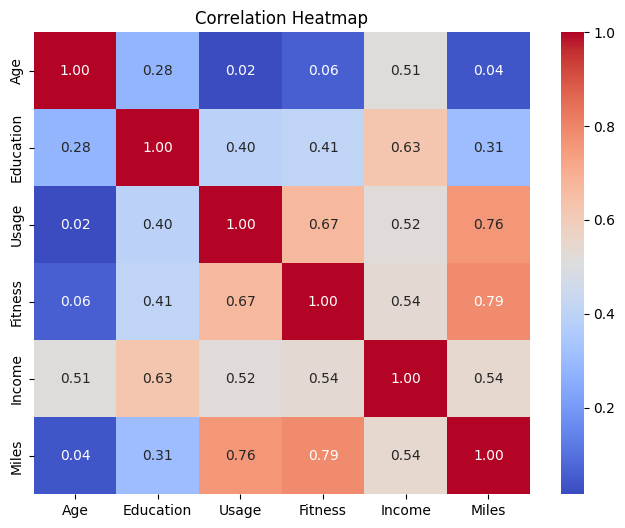

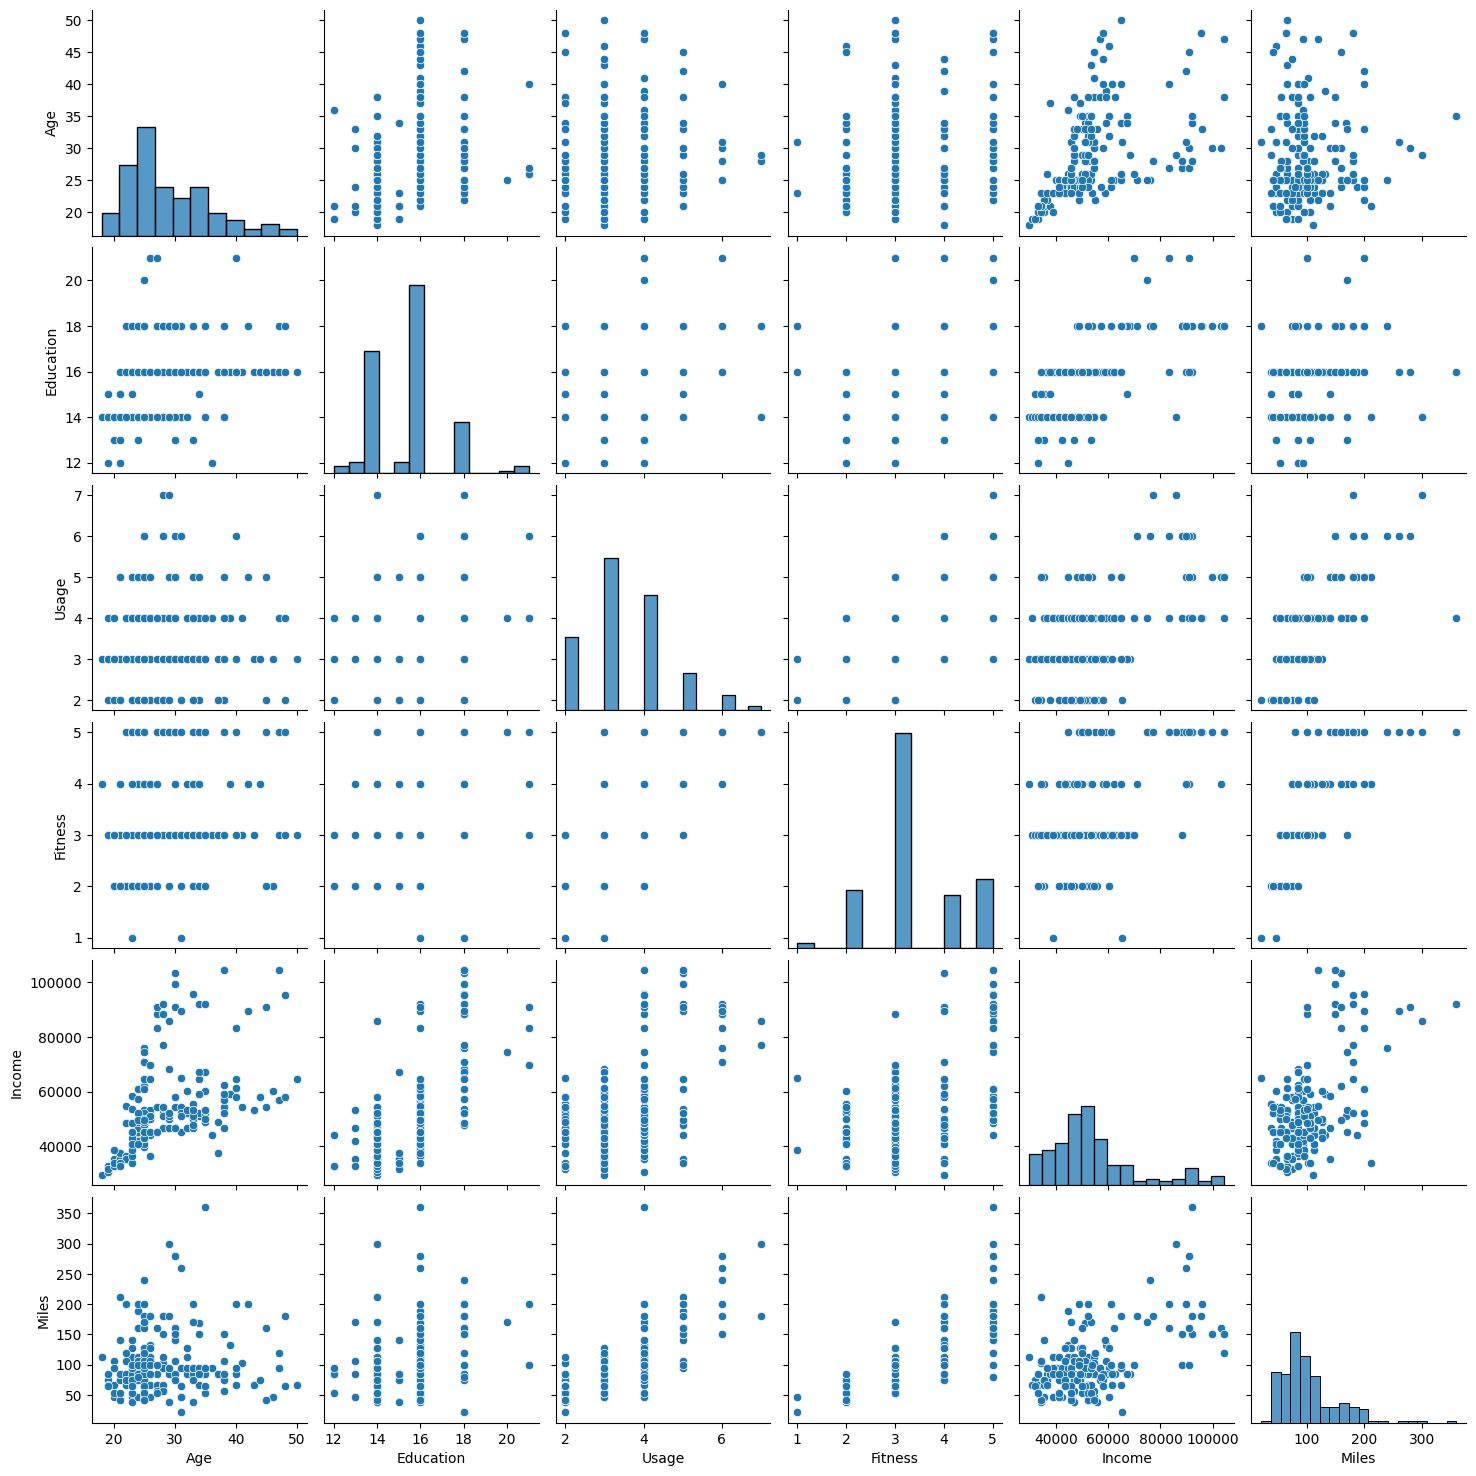

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = num_df.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional detailed view)
sns.pairplot(num_df)
plt.show()


Age and Income are positively related → older customers tend to earn more.

Fitness, Usage, and Miles are strongly connected → fit customers run more miles and use treadmills more often.

Education shows little to no correlation with other features.

**Step 6: Customer Profiles + Business Insights (who buys which treadmill)**

In [11]:
# Conditional probability: P(Product | Gender)
cond_prob_gender = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print(cond_prob_gender)


Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769


Males are 3x more likely than females to buy the high-end KP781.

Females mostly prefer the entry-level KP281.

# **Step 7: Customer Profiling (Categorization of Users)**

KP281 (Entry-level, $1500)

Age: Mostly 18–28 years

Income: Lower (~$30K–$45K)

Fitness: 2–3 (average fitness)

Usage: 2–3 times per week, fewer miles

Demographics: More males and singles
 Profile: Young beginners, casual users, budget-conscious buyers.


 KP481 (Mid-level, $1750)

Age: 25–35 years

Income: Medium (~$45K–$60K)

Fitness: 3–4 (regular exercisers)

Usage: 3–4 times per week, moderate miles

Demographics: Balanced mix of males & females, many partnered
 Profile: Regular fitness users who want balance of features & price.

 KP781 (Advanced, $2500)

Age: 30–40 years

Income: High (~$60K+)

Fitness: 4–5 (fit/athletic customers)

Usage: 5–7 times per week, high miles

Demographics: Mostly males, more partnered
 Profile: Serious fitness enthusiasts, athletes, or high-income professionals.

**step 8: Probability — Marginal & Conditional Summary**

In [12]:
# Marginal probability (product %)
product_dist = df['Product'].value_counts(normalize=True) * 100
print(product_dist)

# Conditional by Gender
cond_by_gender = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print(cond_by_gender.round(2))

# Conditional by Marital Status
cond_by_marital = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print(cond_by_marital.round(2))


Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64
Product  KP281  KP481  KP781
Gender                      
Female   52.63  38.16   9.21
Male     38.46  29.81  31.73
Product        KP281  KP481  KP781
MaritalStatus                     
Partnered      44.86  33.64  21.50
Single         43.84  32.88  23.29


Most customers buy entry-level KP281 (44%), while KP781 is the least common (22%).

Males are much more likely to choose KP781 (32%), while females mostly prefer KP281 (53%).

Marital status has little effect — partnered and single customers show almost the same product mix.

**Step 9: Final Recommendations & Actionable Insights**

KP281 (Entry-level, $1500)

Target: Young customers (18–28), lower income, beginners.

Action: Promote through student discounts, online ads, and budget-friendly bundles.

Upgrade Path: Offer trade-in or loyalty schemes to move them later to KP481/KP781.

2. KP481 (Mid-level, $1750)

Target: Working adults (25–35), medium income, fitness-conscious.

Action: Position as the best value option in ads; highlight durability and family usage.

Promotion: Bundle with fitness accessories (mats, dumbbells) to increase appeal.

3. KP781 (Advanced, $2500)

Target: High-income (>$60K), older (30–40), serious fitness users (Fitness 4–5).

Action: Market in premium gyms, health clubs, corporate wellness programs.

Branding: Highlight advanced features, long durability, and performance.

4. Gender-based strategy

Males are 3x more likely to buy KP781 → target premium treadmill ads to men.

Females prefer KP281 → offer affordable starter packages and fitness apps bundled with KP281.

5. General actions

Use personalized recommendations (based on age, income, and fitness score).

Run email campaigns suggesting the “best treadmill” for new customers after survey inputs.

Cross-sell accessories (shoes, mats, wearables) to enhance customer lifetime value.

 With this, you’ve completed all 9 questions:

Dataset Overview

Outlier Detection

Effect of Features

Marginal Probability

Correlation

Conditional Probability

Customer Profiling

Probabilities Summary

Recommendations


# **  AeroFit Treadmill Case Study SUMMARY**

AeroFit sells three treadmills:

KP281 (Entry model, $1500)

KP481 (Mid model, $1750)

KP781 (Advanced model, $2500)

**The company wanted to know: What kind of people buy each treadmill?**

🔍 What We Found

General Info

Data had 180 customers.

No missing values.

Average age was 29 years.

Average income was $53K per year.

People planned to run about 100 miles per week.

**Product Choice**

44% bought KP281 (entry level).

33% bought KP481 (mid).

22% bought KP781 (advanced).

**Who Buys What**

KP281 → Young (18–28), lower income, fitness beginners, more males, casual users.

KP481 → Adults (25–35), medium income, regular fitness users, balanced males & females.

KP781 → Older (30–40), higher income, high fitness, heavy treadmill users, mostly males.

Gender Effect **bold text**

Females: 53% buy KP281, only 9% buy KP781.

Males: 32% buy KP781, so they are more likely to choose the advanced model.

**Other Factors**

Age & Income go together → older people earn more.

Fitness, Usage, and Miles go together → fit people run more and use treadmill more often.

Business Recommendations **bold text**

KP281 → Market to young, budget customers (students, new professionals). Show it as a good starting treadmill.

KP481 → Promote as “best value” to working adults and families. Add bundle offers (mats, dumbbells).

KP781 → Target high-income, serious fitness users. Advertise in premium gyms, wellness clubs, and to executives.

Gender Strategy → Promote KP781 more towards men, KP281 starter packs more towards women.

Upgrade Path → Give trade-in or loyalty discounts to move customers from KP281 → KP481 → KP781 over time.

**In short:**

Most customers buy the entry model (KP281).

Men are more likely to buy the premium KP781.

Income, age, and fitness level strongly affect which treadmill people buy.

AeroFit can grow sales by targeting the right product to the right group and offering upgrade plans.